## 0. Download the dataset

In [27]:
!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2023-01.parquet
!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2023-02.parquet
!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2023-03.parquet
!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2023-04.parquet
!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2023-05.parquet
!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2023-06.parquet
!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2023-07.parquet
!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2023-08.parquet

!wget -P ./data https://d37ci6vzurychx.cloudfront.net/misc/taxi_zones.zip

--2023-11-14 07:54:05--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 52.85.39.117, 52.85.39.153, 52.85.39.65, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|52.85.39.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473816636 (452M) [application/x-www-form-urlencoded]
Saving to: ‘./data/fhvhv_tripdata_2023-01.parquet’

fhvhv_tripdata_2023 100%[===================>] 451.87M  27.6MB/s    in 19s     

2023-11-14 07:54:25 (24.1 MB/s) - ‘./data/fhvhv_tripdata_2023-01.parquet’ saved [473816636/473816636]

--2023-11-14 07:54:25--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 52.85.39.153, 52.85.39.65, 52.85.39.97, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|52.85.39.153|:443... conn

In [ ]:
!pip install numpy pandas seaborn matplotlib scikit-learn geopandas

## 1. Load the dataset

In [1]:
import pandas as pd
import os

folder_path = './data'

df_1 = pd.read_parquet(os.path.join(folder_path, 'fhvhv_tripdata_2023-01.parquet'))
# df_2 = pd.read_parquet(os.path.join(folder_path, 'fhvhv_tripdata_2023-02.parquet'))
# df_3 = pd.read_parquet(os.path.join(folder_path, 'fhvhv_tripdata_2023-03.parquet'))
# df_4 = pd.read_parquet(os.path.join(folder_path, 'fhvhv_tripdata_2023-04.parquet'))
# df_5 = pd.read_parquet(os.path.join(folder_path, 'fhvhv_tripdata_2023-05.parquet'))
# df_6 = pd.read_parquet(os.path.join(folder_path, 'fhvhv_tripdata_2023-06.parquet'))
# df_7 = pd.read_parquet(os.path.join(folder_path, 'fhvhv_tripdata_2023-07.parquet'))
# df_8 = pd.read_parquet(os.path.join(folder_path, 'fhvhv_tripdata_2023-08.parquet'))  

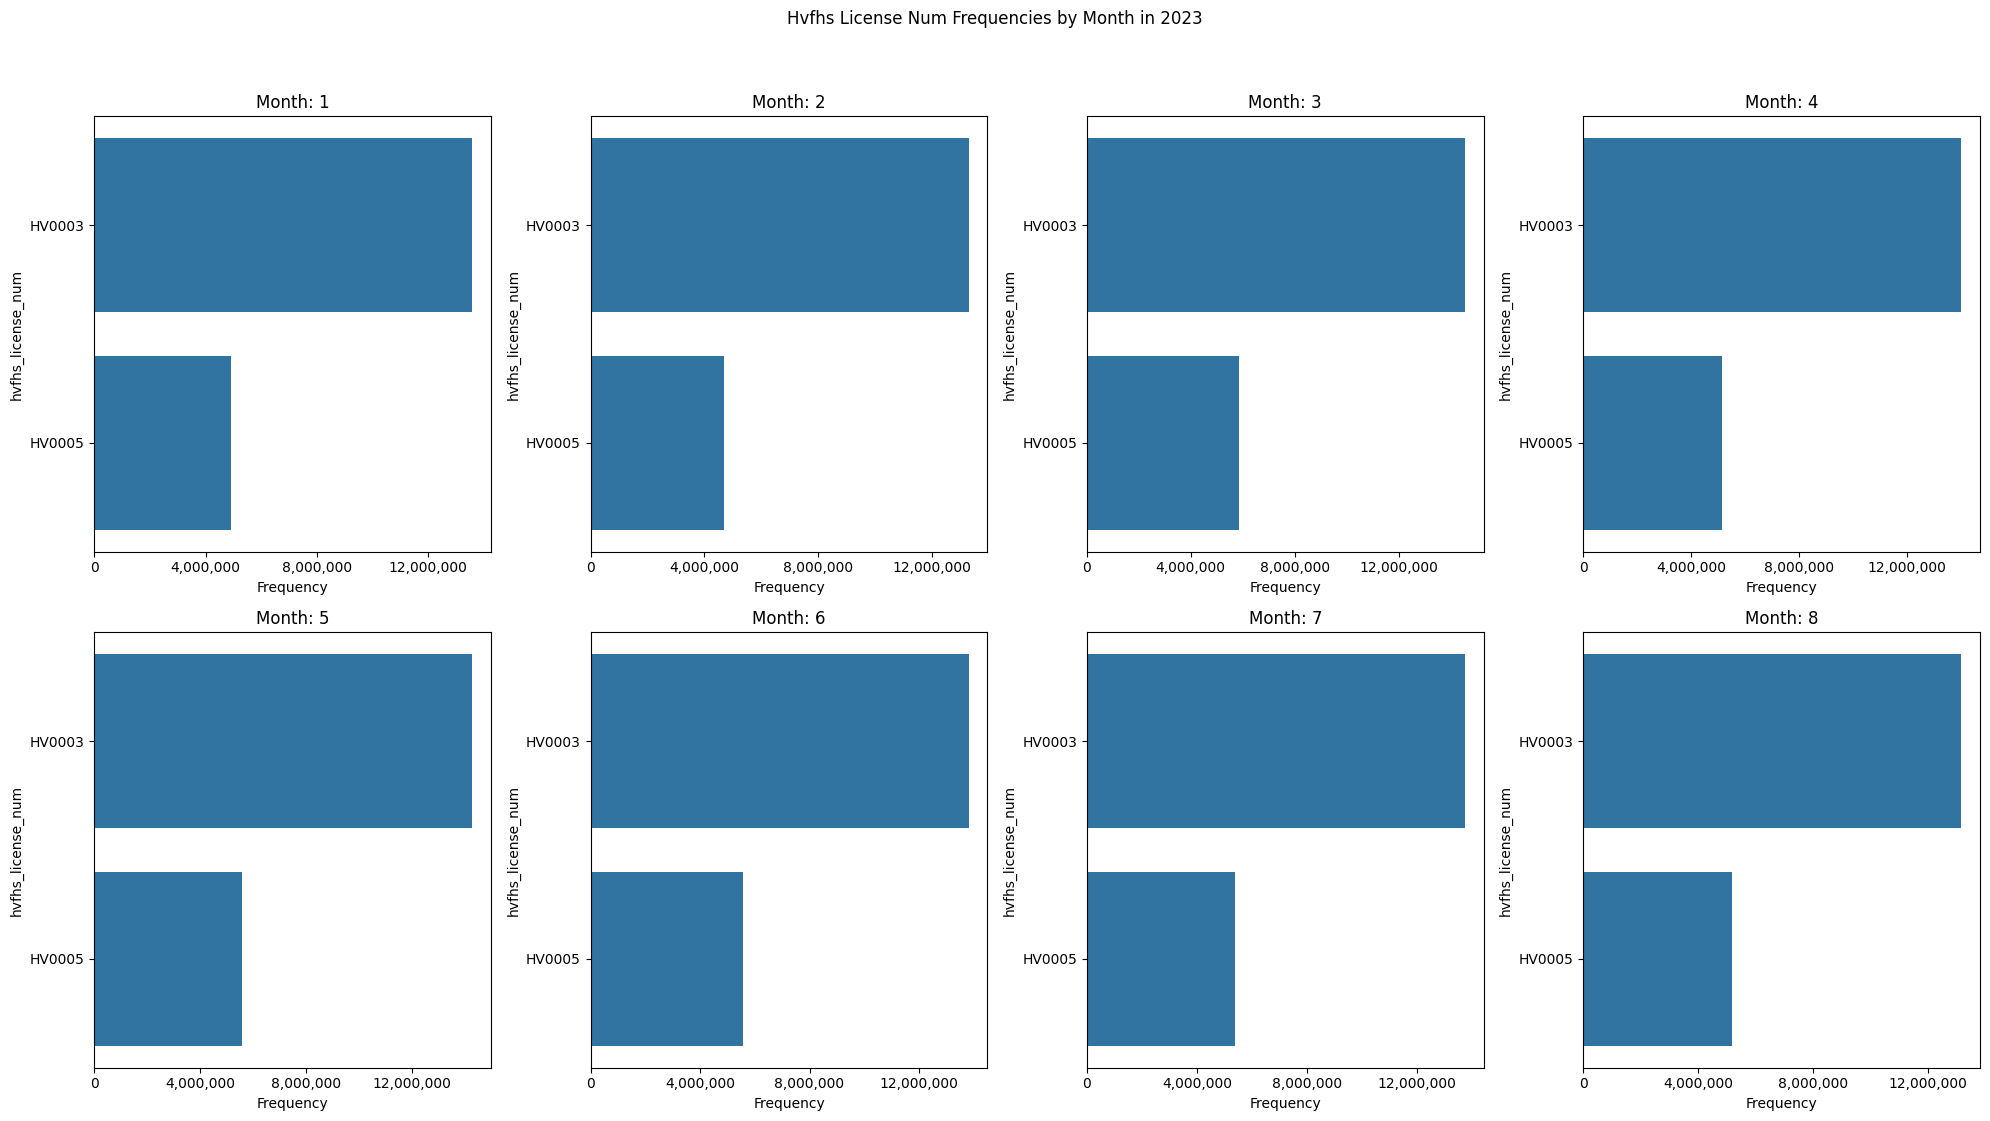

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, StrMethodFormatter

fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Hvfhs License Num Frequencies by Month in 2023')

for i in range(1, 9):
    df_name = f'df_{i}'
    if df_name in globals():
        df = globals()[df_name]
        top_licenses = df['hvfhs_license_num'].value_counts()

        ax = axes[(i-1)//4, (i-1)%4]
        
        sns.barplot(x=top_licenses.values, y=top_licenses.index, ax=ax)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # xticks의 숫자를 자연수로 설정
        ax.xaxis.set_major_locator(MaxNLocator(4)) # xticks를 4개로 설정

        ax.set_title(f'Month: {i}')
        ax.set_xlabel('Frequency')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [2]:
pd.set_option('float_format', '{:.2f}'.format)

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18479031 entries, 0 to 18479030
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [3]:
df_1.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,18479031,13587039,18479031,18479031,18479031.00,18479031.00,18479031.00,18479031.00,18479031.00,18479031.00,18479031.00,18479031.00,18479031.00,18479031.00,18479031.00,18479031.00
mean,2023-01-17 02:32:09.458060,2023-01-17 06:15:32.572615,2023-01-17 02:36:36.490854,2023-01-17 02:54:51.087475,139.31,142.68,4.87,1094.63,21.56,1.03,0.68,1.83,1.12,0.19,0.98,16.78
min,2022-12-31 20:30:00,2022-12-31 21:23:03,2023-01-01 00:00:00,2023-01-01 00:02:27,1.00,1.00,0.00,0.00,-146.34,0.00,0.00,0.00,0.00,0.00,0.00,-102.15
25%,2023-01-09 15:34:10,2023-01-09 19:35:55,2023-01-09 15:37:59,2023-01-09 15:58:02,75.00,76.00,1.55,575.00,10.43,0.00,0.31,0.87,0.00,0.00,0.00,7.70
50%,2023-01-17 09:35:41,2023-01-17 15:57:34,2023-01-17 09:39:34,2023-01-17 09:59:16,140.00,142.00,2.90,906.00,16.26,0.00,0.49,1.39,0.00,0.00,0.00,12.61
75%,2023-01-24 17:46:14,2023-01-24 20:15:07,2023-01-24 17:50:30,2023-01-24 18:10:02,211.00,220.00,6.01,1404.00,26.17,0.00,0.81,2.27,2.75,0.00,0.00,20.99
max,2023-02-01 00:15:00,2023-01-31 23:59:53,2023-01-31 23:59:59,2023-02-01 01:47:23,265.00,265.00,407.56,35359.00,1455.12,184.37,64.71,120.91,8.25,6.90,180.53,1285.04
std,NaN,NaN,NaN,NaN,75.11,78.04,5.66,745.33,18.01,3.76,0.61,1.49,1.35,0.67,2.79,14.18


In [4]:
# hvfhs_license_num: HVFHS; HV0003: Uber, HV0005: Lyft
# dispatching_base_num: B03404: Uber, B02835: Lyft
# originating_dispatch_base_num: B03404: Uber, B02835: Lyft
# requested_pickup_time: 요청한 픽업 시간
# on_scene_datetime: 픽업 장소에 도착한 시간
# pickup_datetime: 승차한 시간
# dropoff_datetime: 하차한 시간
# passenger_count: 승객 수
# PULocationID: 승차 위치 ID
# DOLocationID: 하차 위치 ID
# trip_miles: 여행한 거리
# trip_times: 여행한 시간
# base_passenger_fare: 기본 승객 요금
# tolls: 통행료
# bcf: black car fund
# sales_tax: 판매세
# congestion_surcharge: 혼잡료
# airport_fee: 공항 요금
# tips: 팁
# driver_pay: 드라이버의 총 지급액
# shared_request_flag: 승객이 공유 픽업에 동의했는지 여부
# shared_match_flag: 승객이 다른 승객과 공유되었는지 여부
# access_a_ride_flag: MTA를 대신해 승객을 태웠는지 여부
# wav_request_flag: 승객이 휠체어 접근 가능한 차량을 요청했는지 여부
# wav_matched_flag: 승객이 휠체어 접근 가능한 차량을 탔는지 여부

In [5]:
df_1

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-01-01 00:18:06,2023-01-01 00:19:24,2023-01-01 00:19:38,2023-01-01 00:48:07,48,68,0.94,...,2.30,2.75,0.00,5.22,27.83,N,N,,N,N
1,HV0003,B03404,B03404,2023-01-01 00:48:42,2023-01-01 00:56:20,2023-01-01 00:58:39,2023-01-01 01:33:08,246,163,2.78,...,5.34,2.75,0.00,0.00,50.15,N,N,,N,N
2,HV0003,B03404,B03404,2023-01-01 00:15:35,2023-01-01 00:20:14,2023-01-01 00:20:27,2023-01-01 00:37:54,9,129,8.81,...,2.16,0.00,0.00,0.00,20.22,N,N,,N,N
3,HV0003,B03404,B03404,2023-01-01 00:35:24,2023-01-01 00:39:30,2023-01-01 00:41:05,2023-01-01 00:48:16,129,129,0.67,...,1.22,0.00,0.00,0.00,7.90,N,N,,N,N
4,HV0003,B03404,B03404,2023-01-01 00:43:15,2023-01-01 00:51:10,2023-01-01 00:52:47,2023-01-01 01:04:51,129,92,4.38,...,1.82,0.00,0.00,0.00,16.48,N,N,,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479026,HV0003,B03404,B03404,2023-01-31 23:33:42,2023-01-31 23:37:04,2023-01-31 23:39:34,2023-01-31 23:45:11,161,100,0.67,...,1.31,2.75,0.00,0.00,10.62,N,N,,N,N
18479027,HV0003,B03404,B03404,2023-01-31 23:31:20,2023-01-31 23:35:17,2023-01-31 23:35:25,2023-01-31 23:47:28,129,56,2.04,...,0.88,0.00,0.00,0.00,9.82,N,N,,N,N
18479028,HV0003,B03404,B03404,2023-01-31 23:15:39,2023-01-31 23:16:35,2023-01-31 23:18:09,2023-01-31 23:34:46,234,236,4.14,...,3.41,2.75,0.00,0.00,24.22,N,N,,N,N
18479029,HV0003,B03404,B03404,2023-01-31 23:40:03,2023-01-31 23:41:31,2023-01-31 23:44:07,2023-01-31 23:52:16,237,163,1.10,...,1.37,2.75,0.00,0.00,12.62,N,N,,N,N


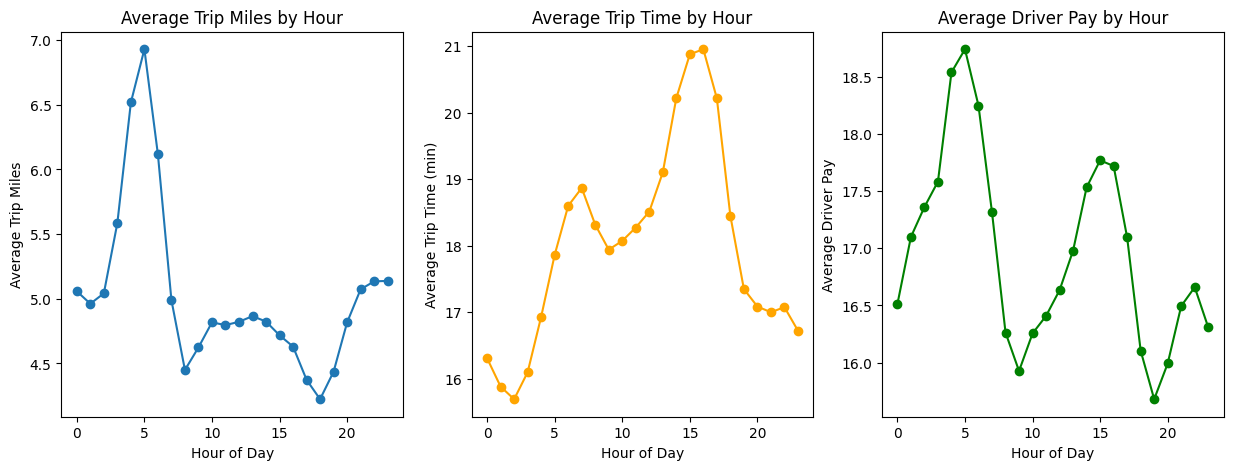

In [6]:
import matplotlib.pyplot as plt

df_1['pickup_datetime'] = pd.to_datetime(df_1['pickup_datetime'])
df_1['trip_time_min'] = df_1['trip_time'] / 60
numeric_cols = ['trip_miles', 'trip_time_min', 'driver_pay']
grouped = df_1[numeric_cols].groupby(df_1['pickup_datetime'].dt.hour).mean()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(grouped['trip_miles'], marker='o')
plt.title('Average Trip Miles by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Miles')

plt.subplot(1, 3, 2)
plt.plot(grouped['trip_time_min'], marker='o', color='orange')
plt.title('Average Trip Time by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Time (min)')

plt.subplot(1, 3, 3)
plt.plot(grouped['driver_pay'], marker='o', color='green')
plt.title('Average Driver Pay by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Driver Pay')

plt.show()

## 2. Split the dataset by time zone

In [7]:
# 00:00 ~ 06:00 # 심야
# 06:00 ~ 10:00 # 출근
# 10:00 ~ 16:00 # 오후
# 16:00 ~ 20:00 # 퇴근
# 20:00 ~ 00:00 # 야간

In [8]:
def filter_by_time_and_license(df, license_num):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    
    timeframes = {
        'dawn': df[(df['pickup_datetime'].dt.hour < 6) & (df['hvfhs_license_num'] == license_num)],
        'morning': df[(df['pickup_datetime'].dt.hour >= 6) & (df['pickup_datetime'].dt.hour < 10) & (df['hvfhs_license_num'] == license_num)],
        'afternoon': df[(df['pickup_datetime'].dt.hour >= 10) & (df['pickup_datetime'].dt.hour < 16) & (df['hvfhs_license_num'] == license_num)],
        'evening': df[(df['pickup_datetime'].dt.hour >= 16) & (df['pickup_datetime'].dt.hour < 20) & (df['hvfhs_license_num'] == license_num)],
        'night': df[(df['pickup_datetime'].dt.hour >= 20) | (df['pickup_datetime'].dt.hour == 0) & (df['hvfhs_license_num'] == license_num)]
    }
    
    return timeframes

# 예시 사용
uber_1_timeframes = filter_by_time_and_license(df_1, 'HV0003')
lyft_1_timeframes = filter_by_time_and_license(df_1, 'HV0005')

## 3. Plotting in the map

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

zones = gpd.read_file('./data/taxi_zones/taxi_zones.shp')

In [10]:
zones

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.12,0.00,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.43,0.00,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.08,0.00,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.04,0.00,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.09,0.00,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.13,0.00,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.13,0.00,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.03,0.00,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.05,0.00,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


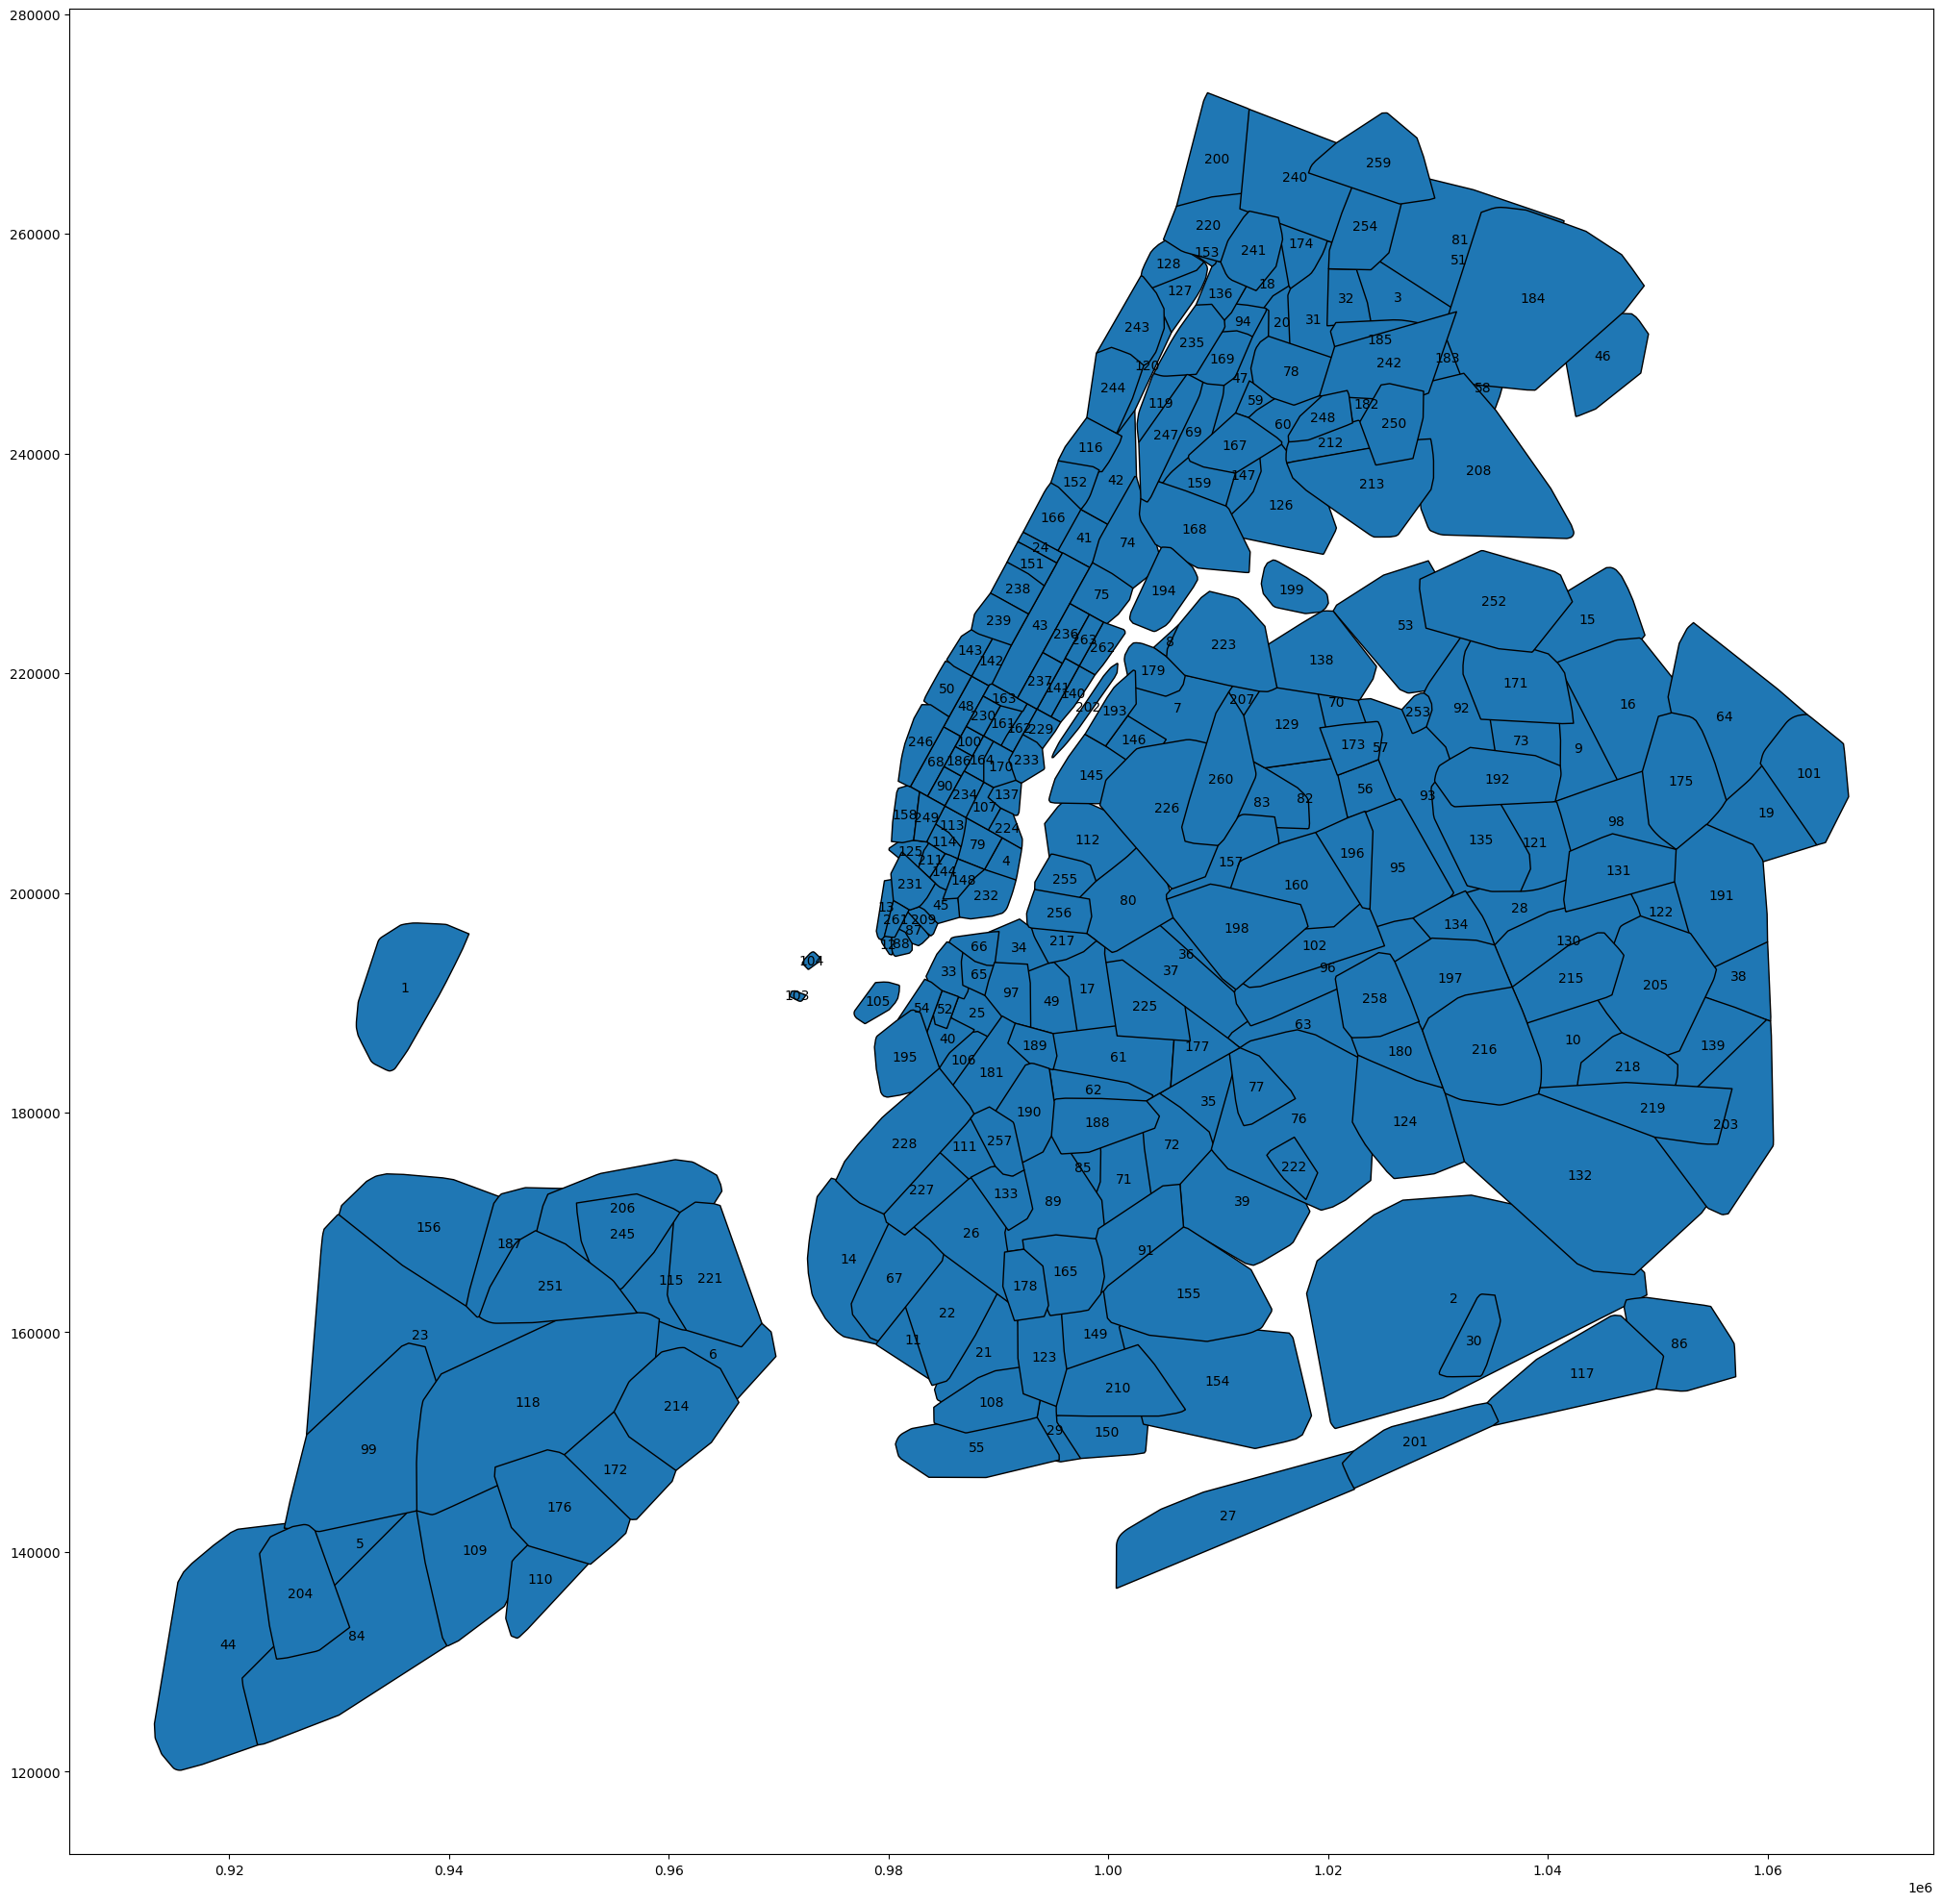

In [11]:
zones['convex_hull'] = zones.geometry.convex_hull

fig, ax = plt.subplots(figsize=(25, 25))

# 각 Convex Hull 그리기
zones.convex_hull.plot(ax=ax, edgecolor='black')

# 각 Convex Hull의 중심에 OBJECTID 표시
for idx, row in zones.iterrows():
    # Convex Hull의 중심 좌표를 얻음
    center = row['convex_hull'].centroid.coords[0]
    ax.text(center[0], center[1], str(row['OBJECTID']), verticalalignment='center', horizontalalignment='center')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

def plot_arrow(pickup_point, dropoff_point, ax):
    arrow = FancyArrowPatch(pickup_point, dropoff_point, arrowstyle='->', mutation_scale=10, color='red')
    ax.add_patch(arrow)

fig, ax = plt.subplots(figsize=(25, 25))
zones.convex_hull.plot(ax=ax, edgecolor='black')

for idx, row in zones.iterrows():
    center = row['convex_hull'].centroid.coords[0]
    ax.text(center[0], center[1], str(row['OBJECTID']), verticalalignment='center', horizontalalignment='center')

for index, trip in uber_1_timeframes['dawn'].iterrows():
    pickup_zone = zones[zones['OBJECTID'] == trip['PULocationID']]
    dropoff_zone = zones[zones['OBJECTID'] == trip['DOLocationID']]

    if not pickup_zone.empty and not dropoff_zone.empty:
        pickup_location = pickup_zone.centroid.iloc[0].coords[0]
        dropoff_location = dropoff_zone.centroid.iloc[0].coords[0]
        plot_arrow(pickup_location, dropoff_location, ax)

plt.show()